# COVID-19(ESPAÑA)  ¿Hemos aprendido algo?

### El objetivo de esta practica es: 
           1) Uso de python, pandas y numpy para procesar los datos extraidos de una fuente de datos abierta.
           2) Aplicación de Bokeh para Graficos Interactivos asi como Matplotlib para poder comparar argumentos.
           3) Responder nuestra hipotesis ¿hemos aprendido algo?, obteniendo una comparativa pre-confinamiento y post-confinamiento.

In [199]:
# Carga de librerias, bokeh para visualicaciones interactivas, numpy operaciones matematicas
# y pandas para trabajo con hojas de datos y agilidad de filtrado.
import datetime
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from os import listdir
from bokeh import plotting
from bokeh.io import output_notebook, show
from bokeh.models import HoverTool, FactorRange, CustomJS, Div, Row, ImageURL
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot
from IPython.display import display, HTML
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category20c
output_notebook()

Loading BokehJS ...

## Cargamos los datos de la fuente: https://covid.ourworldindata.org

In [153]:
data = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv")
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

### Datos actuales:

Informe actualizado al: 2020-Sep-09 19:55 >>> Fuente de datos actualizados:  2020-09-09
Actualmente total infectados: 534513 total defunciones: 29594
Al inicio de la pandemia(pre-confinamiento) la mortandad era de un: 11.6 %
Despues del confinamiento(post-confinamiento) la mortandad es de un: 5.54 %
El estado y su sanidad esta en un estado critico del : 64.3  %
El estado y sistema sanitario a evitado un : 35.7  % de las muertes a causa de COVID-19 


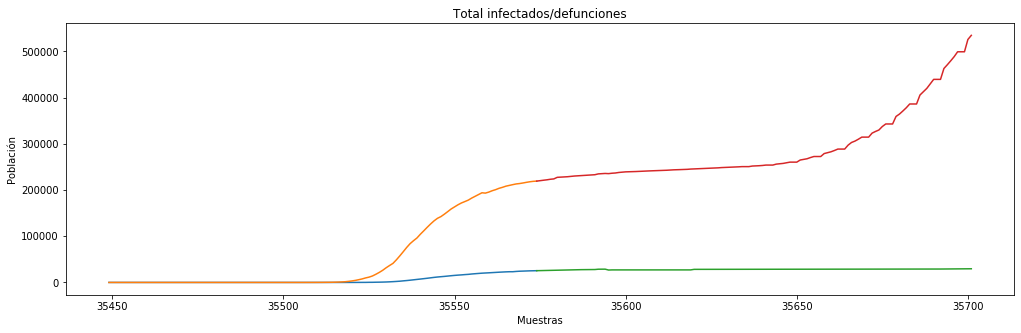

In [213]:
# Filtramos infectados por el virus y defunciones.
c = int(data['total_cases'][data['location'] == 'Spain'].max())
d = int(data['total_deaths'][data['location'] == 'Spain'].max())
print("Informe actualizado al: " +
      str(datetime.datetime.now().strftime("%Y-%b-%d %H:%M")), ">>> Fuente de datos actualizados: ", str(data.date.iloc[-1])[0:10])
print('Actualmente total infectados:', c, 'total defunciones:', d)

# Las funciones han de cargarse previamente antes de esta celda que solo actua como dashboard
dataM, dataS = filtro_datos()
analisis(dataM, dataS)
pre_confinamiento()
post_confinamiento()

## Resultados: 
              A) Un resultado de criticidad por encima del 50% podria llevarnos a un nivel de mortandad pre-confinamiento.  
              B) Un resultado inferior al 50% podria ser un indicativo de mejoras significativas para paliar la mortandad como consecuencia del COVID-19.

In [211]:
def filtro_datos():
    
    # Comparativa entre inicio de la Pandemia en España hasta confinamiento y desde confinamiento a dia actual.
    # Fecha elegida post y pre confinamiento: https://www.boe.es/buscar/doc.php?id=BOE-A-2020-4792

    #Creamos los filtros segun la fecha de confinamiento
    dataS = data[(data['location'] == 'Spain') & (data['date'] <= '2020-05-04')] #  pre-confinamiento
    dataM = data[(data['location'] == 'Spain') & (data['date'] >= '2020-05-04')] # post-confinamiento


    # Mostramos las diferentes etapas, (rojo/verde-pre),(naranja/azul-post)
    plt.figure(figsize=(17, 5))
    plt.xlabel('Muestras')  
    plt.ylabel('Población')
   
    #Pre-confinamiento
    dataS.total_deaths.plot()
    dataS.total_cases.plot(title='Total infectados/defunciones')


    #Post-confinamiento
    dataM.total_deaths.plot()
    dataM.total_cases.plot()
    return(dataM,dataS)

In [212]:
def analisis(dataM,dataS):
    ''' 
    Ivan Vazquez Caballero
    https://www.CienciayDatos.es/
    
    '''

    # Pre-confinamiento----------------------------------------------

    # Total infectados
    infectados_pre = dataS.total_cases.iloc[-1]

    # Total defunciones
    defunciones_pre = dataS.total_deaths.iloc[-1]

    # Sacamos el 1% de todos los casos totales
    porcentaje_pre = infectados_pre / 100
    porcentaje_inf_def_pre = round(defunciones_pre / porcentaje_pre, 1)
    # Calculamos el porcentaje de defunciones por infectados (redondeo a 1 decimal)
    print('Al inicio de la pandemia(pre-confinamiento) la mortandad era de un:',
          porcentaje_inf_def_pre, '%')

    # Post-confinamiento-----------------------------------------------

    # Total infectados
    infectados_post = dataM.total_cases.iloc[-1]

    # Total defunciones
    defunciones_post = dataM.total_deaths.iloc[-1]

    # Sacamos el 1% de todos los casos totales
    porcentaje_post = infectados_post / 100
    porcentaje_inf_def_post = round(defunciones_post / porcentaje_post, 2)
    # Calculamos el porcentaje de defunciones por infectados (redondeo a 1 decimal)
    print('Despues del confinamiento(post-confinamiento) la mortandad es de un:',
          porcentaje_inf_def_post, '%')

    # Resultado final ----------------------------------------------------

    # Basandonos en el caso extremo pre-confinamiento
    porcentaje_inf_def = porcentaje_inf_def_pre / 100
    estado_actual = (round((porcentaje_inf_def * porcentaje_inf_def_post), 3))*100
    print('El estado y su sanidad esta en un estado critico del :', estado_actual, ' %')
    print('El estado y sistema sanitario a evitado un :', 100-estado_actual, ' % de las muertes a causa de COVID-19 ')


# Zoom a los datos Pre-confinamiento COVID-19 (España)

In [189]:
def pre_confinamiento():
    ''' 
    Ivan Vazquez Caballero
    https://www.CienciayDatos.es/
    
    '''

    sourceS = plotting.ColumnDataSource(dataS)
   
    
    p = figure(title="",
               x_axis_label='Fecha Pre',
               y_axis_label='Número Casos',
               plot_width=700,
               plot_height=250,
               sizing_mode='scale_width',
               x_axis_type='datetime',
               tools="box_zoom, reset, wheel_zoom, save")

    plot1 = p.line(x='date',
                   y='total_cases',
                   line_width=2,
                   source=sourceS,
                   color='red')

    p.circle(x='date',
             y='total_cases',
             size=6,
             source=sourceS,
             fill_color=None,
             color='red')

    plot2 = p.line(x='date',
                   y='total_deaths',
                   line_width=2,
                   source=sourceS,
                   color='green')

    p.circle(x='date',
             y='total_deaths',
             size=6,
             source=sourceS,
             fill_color=None,
             color='green')

    p.add_tools(
        HoverTool(renderers=[plot1],
                  tooltips=[
                      ("País", "@location"),
                      ("Fecha", "@date{%F}"),
                      ("Casos Totales", "@total_cases"),
                  ],
                  formatters={'@date': 'datetime'}))

    p.add_tools(
        HoverTool(renderers=[plot2],
                  tooltips=[
                      ("País", "@location"),
                      ("Fecha", "@date{%F}"),
                      ("Decesos Totales", "@total_deaths"),
                  ],
                  formatters={'@date': 'datetime'}))

    p.toolbar.active_drag = None
    p.left[0].formatter.use_scientific = False
    p.title.text_font_size = '3vw'
    p.xaxis.axis_label_text_font_size = "2vw"
    p.yaxis.axis_label_text_font_size = "2vw"
    p.xaxis.major_label_text_font_size = "1.3vw"
    p.yaxis.major_label_text_font_size = "1vw"

    show(p)

# Zoom a los datos Post-confinamiento COVID-19 (España)

In [188]:
def post_confinamiento():
    ''' 
    Ivan Vazquez Caballero
    https://www.CienciayDatos.es/
    
    '''

    sourceM = plotting.ColumnDataSource(dataM)
    
    
    p = figure(title="",
               x_axis_label='Fecha Post',
               y_axis_label='Número Casos',
               plot_width=700,
               plot_height=250,
               sizing_mode='scale_width',
               x_axis_type='datetime',
               tools="box_zoom, reset, wheel_zoom, save")

    plot1 = p.line(x='date',
                   y='total_cases',
                   line_width=2,
                   source=sourceM,
                   color='orange')

    p.circle(x='date',
             y='total_cases',
             size=6,
             source=sourceM,
             fill_color=None,
             color='orange')

    plot2 = p.line(x='date',
                   y='total_deaths',
                   line_width=2,
                   source=sourceM,
                   color='blue')

    p.circle(x='date',
             y='total_deaths',
             size=6,
             source=sourceM,
             fill_color=None,
             color='blue')

    p.add_tools(
        HoverTool(renderers=[plot1],
                  tooltips=[
                      ("País", "@location"),
                      ("Fecha", "@date{%F}"),
                      ("Casos Totales", "@total_cases"),
                  ],
                  formatters={'@date': 'datetime'}))

    p.add_tools(
        HoverTool(renderers=[plot2],
                  tooltips=[
                      ("País", "@location"),
                      ("Fecha", "@date{%F}"),
                      ("Decesos Totales", "@total_deaths"),
                  ],
                  formatters={'@date': 'datetime'}))

    p.toolbar.active_drag = None
    p.left[0].formatter.use_scientific = False
    p.title.text_font_size = '3vw'
    p.xaxis.axis_label_text_font_size = "2vw"
    p.yaxis.axis_label_text_font_size = "2vw"
    p.xaxis.major_label_text_font_size = "1.3vw"
    p.yaxis.major_label_text_font_size = "1vw"

    show(p)